In [1]:
import os
import glob
os.getcwd()

'/home/xchen/Projects/XMutant/DeepJanus-MNIST/data_analysis'

In [2]:
run_path = os.path.join("..", "runs_server", "runs_400_equal_weight_1")
assert os.path.exists(run_path), f"run_oath path {run_path} does not exist"

In [3]:
import pandas as pd
import json

def convert_timestamp_to_seconds(timestamp):
    """covert '0:00:54.982889' to seconds"""
    return pd.to_timedelta(timestamp).total_seconds()

file_name = glob.glob(os.path.join(run_path, f"MNIST_02-*"))
print(f"Found {len(file_name)} folders")
df_all = None

for file in file_name:
    print(file)

    config_json = os.path.join(file, "config.json")
    with open(config_json, "r") as f:
        config = json.load(f)
        # print(config)
    df_csv = pd.read_csv(os.path.join(file, "stats.csv"), header=0, names=["run",  "iteration",  "timestamp", "archive_len", "sparseness"],usecols=range(5))# , header=None

    df_csv["timestamp_seconds"] = df_csv["timestamp"].apply(convert_timestamp_to_seconds)
    df_csv.drop(columns=["run", "timestamp"], inplace=True)

    df_csv["xmutant_config"] = f"{config['xmutant_xai']}_{config['xmutant_selection']}_{config['xmutant_direction']}"
    df_csv["archive_threshold"] = config["archive tshd"]

    if df_all is None:
        df_all = df_csv
    else:
        df_all = pd.concat([df_all, df_csv], ignore_index=True)

#         df_summary = df_summary.merge(df_csv, on=["iteration",'xmutant_config', "archive_threshold"] , suffixes=("", "_new"))
#         # update
#         df_summary["archive_len"] += df_summary["archive_len_new"]
#         df_summary["timestamp_seconds"] += df_summary["timestamp_seconds_new"]
#         df_summary.drop(columns=["archive_len_new", "timestamp_seconds_new"], inplace=True)
# #

Found 60 folders
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-38_label_6_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-16_label_4_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-00_label_2_gen_400_AT_1.0_None
../runs_server/runs_400_equal_weight_1/MNIST_02-21_15-12_label_9_gen_400_AT_1.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-56_label_7_gen_400_AT_4.0_None
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-06_label_3_gen_400_AT_1.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-43_label_6_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_15-10_label_9_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-21_label_4_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_13-37_label_0_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight_1/MNIST_02-21_14-33_label_5_gen_400_AT_1.0_None


In [4]:
df_summary = df_all.groupby(["iteration", "xmutant_config", "archive_threshold"], as_index=False).agg(
    archieve_sum=("archive_len", "sum"),
    sparseness_avg=("sparseness", "mean"),
    timestamp_sum=("timestamp_seconds", "sum")
)


In [5]:
df_summary

iteration                         xmutant_config archive_threshold  \
0           10                     None_random_random               1.0   
1           10                     None_random_random               4.0   
2           10     SmoothGrad_clustering_random_cycle               1.0   
3           10     SmoothGrad_clustering_random_cycle               4.0   
4           10  SmoothGrad_clustering_toward_centroid               1.0   
..         ...                                    ...               ...   
235        400                     None_random_random               4.0   
236        400     SmoothGrad_clustering_random_cycle               1.0   
237        400     SmoothGrad_clustering_random_cycle               4.0   
238        400  SmoothGrad_clustering_toward_centroid               1.0   
239        400  SmoothGrad_clustering_toward_centroid               4.0   

     archieve_sum  sparseness_avg  timestamp_sum  
0              18        3.189388      10.033403  
1              15        3.924056      10.084628  
2              25        4.680716      30.008905  
3              15        2.852182      29.111775  
4              17        3.155106      28.474938  
..            ...             ...            ...  
235           168       10.048393     323.921055  
236          1743        6.599316    1772.292519  
237           119        8.424373    1017.218896  
238          1119        5.980093    1531.419582  
239            96        8.321981    1009.042015  

[240 rows x 6 columns]

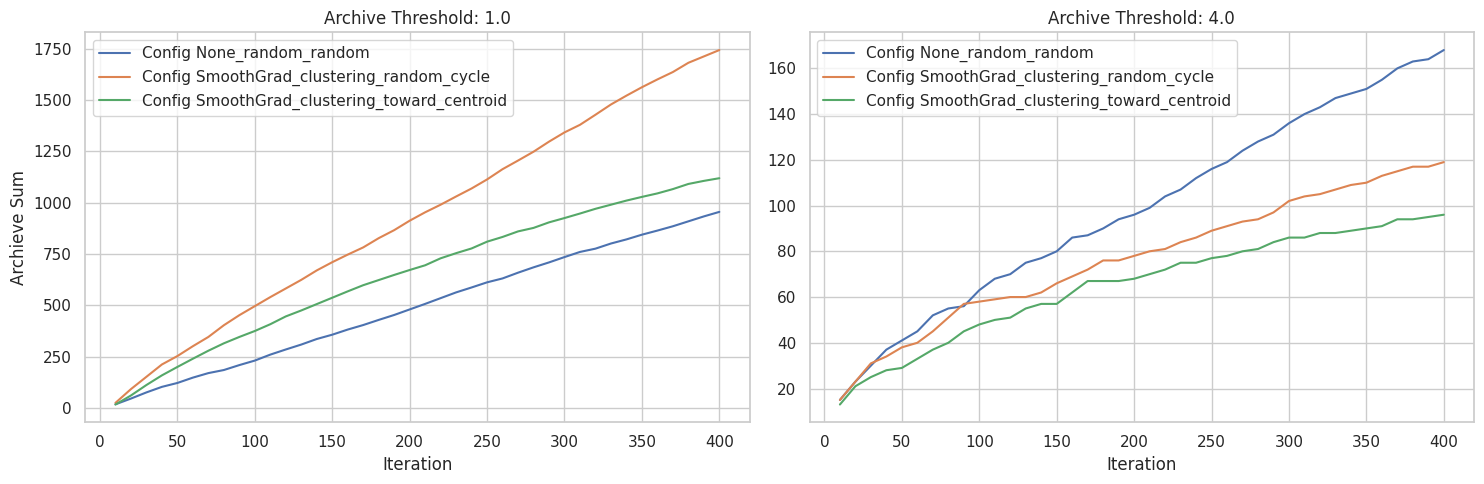

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get unique archive_threshold values
archive_thresholds = df_summary["archive_threshold"].unique()
configs = df_summary["xmutant_config"].unique()  # Get unique config values

# Set up the plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(archive_thresholds), figsize=(15, 5), sharey=False)

# Loop through each archive_threshold and plot
for i, threshold in enumerate(archive_thresholds):
    ax = axes[i] if len(archive_thresholds) > 1 else axes  # Support single plot case
    df_subset = df_summary[df_summary["archive_threshold"] == threshold]

    # Plot for each config
    for config in configs:
        df_config = df_subset[df_subset["xmutant_config"] == config]
        ax.plot(df_config["iteration"], df_config["archieve_sum"], label=f"Config {config}")

    ax.set_title(f"Archive Threshold: {threshold}")
    ax.set_xlabel("Iteration")
    if i == 0:
        ax.set_ylabel("Archieve Sum")
    ax.legend()


# Show the plots
plt.tight_layout()
plt.show()


In [7]:
configs

array(['None_random_random', 'SmoothGrad_clustering_random_cycle',
       'SmoothGrad_clustering_toward_centroid'], dtype=object)

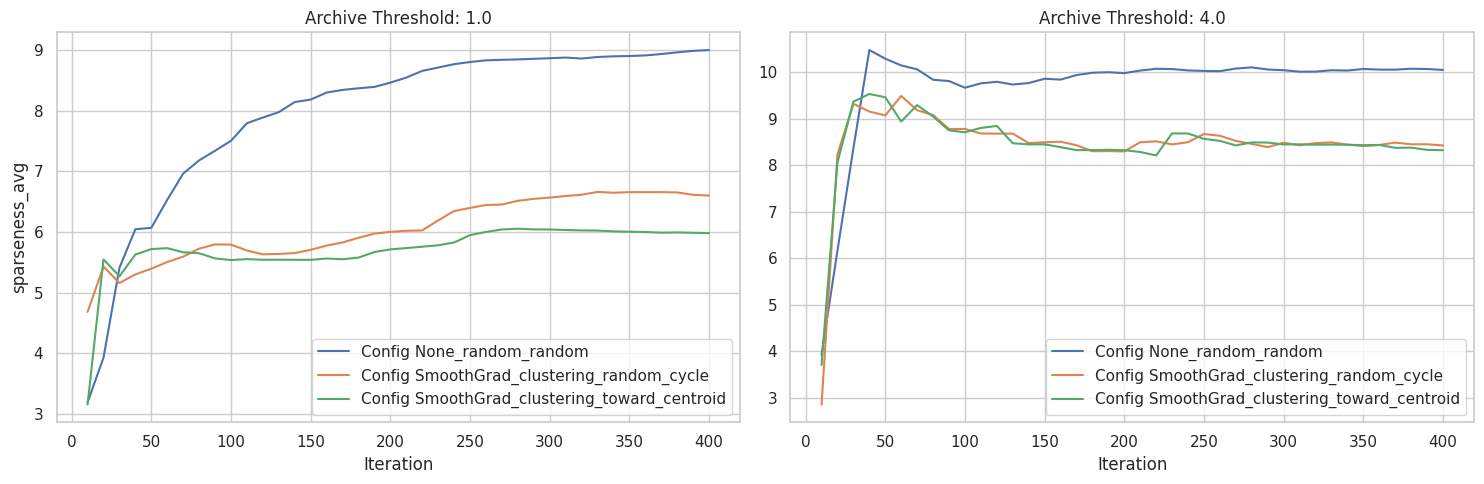

In [8]:
sns.set_style("whitegrid")

# Get unique archive_threshold values
archive_thresholds = df_summary["archive_threshold"].unique()
configs = df_summary["xmutant_config"].unique()  # Get unique config values

# Set up the plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(archive_thresholds), figsize=(15, 5), sharey=False)

# Loop through each archive_threshold and plot
for i, threshold in enumerate(archive_thresholds):
    ax = axes[i] if len(archive_thresholds) > 1 else axes  # Support single plot case
    df_subset = df_summary[df_summary["archive_threshold"] == threshold]

    # Plot for each config
    for config in configs:
        df_config = df_subset[df_subset["xmutant_config"] == config]
        ax.plot(df_config["iteration"], df_config["sparseness_avg"], label=f"Config {config}")

    ax.set_title(f"Archive Threshold: {threshold}")
    ax.set_xlabel("Iteration")
    if i == 0:
        ax.set_ylabel("sparseness_avg")
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()